## Problem Statement


You are a data scientist at a management consulting firm specializing in workplace efficiency and employee productivity. You have been provided with a dataset named **"employees_work_hours_data.csv"**, containing detailed records of employees’ work hours and related attributes in a corporate setting. The dataset includes the following columns:

- **employee_id:** A unique identifier for each employee.
- **department:** The department where the employee works (e.g., Sales, IT, HR).
- **remote_working:** Indicates whether the employee is working remotely (Yes/No).
- **hours_worked_per_day:** The average number of hours the employee works per day.

**Import Necessary Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Task1: Importing and Examining the Dataset

1. Import the data from the "employees_work_hours_data.csv" file.
2. display the number of rows and columns. 
3. Display the first few rows of the dataset to get an overview.


In [4]:
df = pd.read_csv('employees_work_hours_data.csv', )
print(df.shape)
df.head()

(2800, 4)


,employee_id,department,remote_working,hours_worked_per_day
0,E0001,HR,No,10.1
1,E0002,HR,No,8.5
2,E0003,IT,Yes,9.2
3,E0004,Marketing,No,10.7
4,E0005,Marketing,Yes,10.2


### Task2: Statistical Measures of Work Hours

Compute fundamental statistical measures for the 'hours_worked_per_day' column.
- **Calculate the Mean**: Average number of hours worked per day by the employees.
- **Compute the Standard Deviation**: The amount of variation or dispersion in the daily work hours.

In [6]:
mean = round(df.hours_worked_per_day.mean(),2)
std = round(df.hours_worked_per_day.std(), 2)
mean, std

(np.float64(7.98), np.float64(1.34))

### Task3: Calculating Z-Scores for Outlier Detection

- **Compute Z-Scores:** For each entry in the 'hours_worked_per_day' column, calculate its Z-score. The Z-score represents how many standard deviations a value is from the mean, which is crucial for identifying outliers.

In [7]:
df['z_score'] = (df.hours_worked_per_day-mean)/std
df.head()

,employee_id,department,remote_working,hours_worked_per_day,z_score
0,E0001,HR,No,10.1,1.582090
1,E0002,HR,No,8.5,0.388060
2,E0003,IT,Yes,9.2,0.910448
3,E0004,Marketing,No,10.7,2.029851
4,E0005,Marketing,Yes,10.2,1.656716


### Task4: Removing Outliers Based on Z-Scores

- Identify and exclude rows where the 'hours_worked_per_day' Z-score is less than -3 or greater than +3, thus removing outliers from the dataset.

In [13]:
normalized = df[(df.z_score > -3) & (df.z_score < 3)]
normalized.head(5)

,employee_id,department,remote_working,hours_worked_per_day,z_score
0,E0001,HR,No,10.1,1.582090
1,E0002,HR,No,8.5,0.388060
2,E0003,IT,Yes,9.2,0.910448
3,E0004,Marketing,No,10.7,2.029851
4,E0005,Marketing,Yes,10.2,1.656716


### Task5: Standard Normal Distribution Post-Outlier Removal

-  Construct a visual plot of the Standard Normal Distribution using the Z-scores from the 'hours_worked_per_day' data, ensuring to include only the data after outlier removal. 

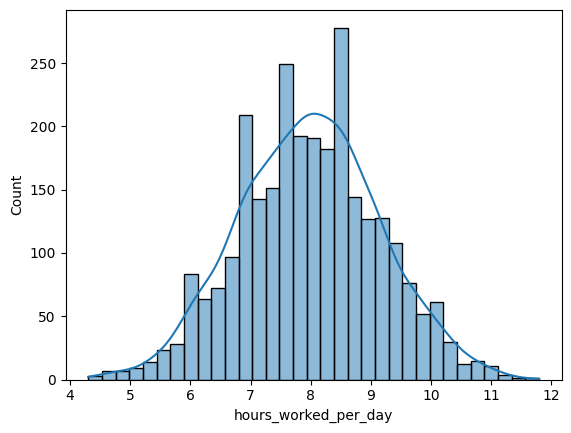

In [18]:
sns.histplot(normalized.hours_worked_per_day, kde = True)
plt.show()